<a href="https://colab.research.google.com/github/DhanasriBatchu/FMML_LABS/blob/main/Module_01_Lab_02_MLPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [19]:
 dataset = datasets.fetch_california_housing()
# print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
# print(dataset.keys())  # if you want to know what else is there in this dataset
dataset.target = dataset.target.astype(np.int32) # so that we can classify
print(dataset.data.shape)
print(dataset.target.shape)


(20640, 8)
(20640,)


Here is a function for calculating the 1-nearest neighbours

In [20]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [21]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [22]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [23]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [24]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [25]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [26]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [27]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [28]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [29]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

1A:
Increase in Validation Set Percentage:

Pros: With a larger validation set, you provide more data for evaluating the model's performance. This can lead to more reliable estimates of the model's generalization performance.
Cons: However, if the validation set becomes too large relative to the training set, the model may not learn enough from the training data, leading to underfitting. In such cases, the model may not capture the underlying patterns in the data well, resulting in lower accuracy on both the training and validation sets.
Decrease in Validation Set Percentage:

Pros: A smaller validation set allows for more data to be used in training the model. With more training data, the model may have a better opportunity to learn complex patterns and generalize well to unseen data.
Cons: However, with a smaller validation set, the estimate of the model's performance on unseen data may be less reliable. The model's accuracy on the validation set may vary more due to random fluctuations in the data, leading to potentially optimistic or pessimistic estimates of performance.

2A:
Large Training Set, Small Validation Set:

With a large training set and a small validation set, the model has more data to learn from during training. This can lead to better model generalization if the training set is representative of the underlying data distribution. However, the small validation set may provide a less reliable estimate of the model's performance on unseen data due to higher variance in the validation set accuracy.
Small Training Set, Large Validation Set:

Conversely, with a small training set and a large validation set, the model may not have enough data to learn complex patterns during training. This can lead to overfitting, where the model performs well on the training data but poorly on unseen data. However, the larger validation set may provide a more reliable estimate of the model's performance on unseen data due to lower variance in the validation set accuracy.
Balanced Training and Validation Set Sizes:

Ideally, you want to strike a balance between the sizes of the training and validation sets. A reasonably large training set allows the model to learn from sufficient data, while a reasonably large validation set provides a reliable estimate of the model's performance on unseen data. Cross-validation techniques, such as k-fold cross-validation, can help mitigate the variability in performance estimates and provide more robust assessments of model performance.

3A:
Size of the Dataset: If you have a large dataset, you can afford to allocate a smaller percentage to the validation set, as there will still be sufficient data for training. Conversely, if you have a smaller dataset, you may need to allocate a larger percentage to the validation set to ensure a representative sample for evaluating model performance.

Complexity of the Model: More complex models tend to have a higher risk of overfitting, especially when trained on smaller datasets. In such cases, you may want to allocate a larger percentage to the validation set to obtain a more reliable estimate of model performance.

Availability of Data: Consider the availability of data for both training and validation. If you have limited data, you may need to strike a balance between allocating enough data for training and reserving data for validation.

Cross-Validation: In addition to splitting the data into training and validation sets, consider using cross-validation techniques such as k-fold cross-validation. Cross-validation can provide more robust estimates of model performance by leveraging multiple validation sets.

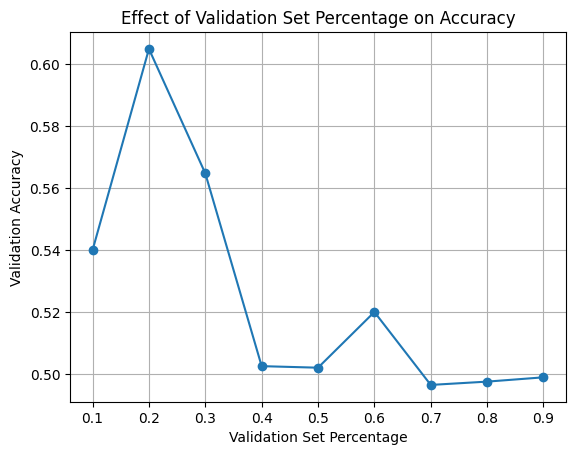

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate some synthetic data
X = np.random.rand(1000, 10)  # Features
y = np.random.randint(0, 2, 1000)  # Binary labels

# Define validation set percentages to experiment with
validation_percentages = np.linspace(0.1, 0.9, 9)  # From 10% to 90%

# Lists to store results
validation_accuracies = []

# Experiment with different validation set percentages
for val_percentage in validation_percentages:
    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_percentage, random_state=42)

    # Train a simple logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = model.predict(X_val)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_val, y_pred)
    validation_accuracies.append(accuracy)

# Plot the results
plt.plot(validation_percentages, validation_accuracies, marker='o')
plt.title('Effect of Validation Set Percentage on Accuracy')
plt.xlabel('Validation Set Percentage')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()


## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [31]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [32]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.33584635395170215
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


1A:
Reduces Variance: Each data split may result in slightly different validation accuracy due to the random assignment of data points. Averaging across multiple splits helps reduce the variance in the estimated performance metric, providing a more stable and reliable estimate of model performance.

Better Generalization: By training and evaluating the model on multiple different subsets of the data, we obtain a better understanding of how the model performs on unseen data. This helps improve the generalization of the model's performance estimates to new, unseen data.

Mitigates Bias: Averaging across multiple splits helps mitigate the potential bias introduced by any single data split. By considering multiple splits, we obtain a more representative estimate of the model's performance across different subsets of the data.

Cross-Validation: Techniques like k-fold cross-validation systematically partition the data into multiple folds, ensuring that each data point is used for both training and validation. By averaging the performance metrics across different folds, we obtain a more robust estimate of model performance.

2A:
Variability in Performance: Machine learning models can perform differently on different subsets of the data due to factors such as randomness in the data splitting process, inherent variability in the data, and sensitivity to initial conditions. Averaging validation accuracy across multiple splits helps mitigate some of this variability but may not completely eliminate it.

Generalization to Unseen Data: Validation accuracy, obtained by evaluating the model on a validation set, provides an estimate of how well the model generalizes to unseen data. Averaging validation accuracy across multiple splits provides a more robust estimate of this generalization performance by considering multiple subsets of the data. However, it's still an estimate and may not perfectly reflect the model's performance on a completely unseen test set.

Cross-Validation Techniques: Techniques like k-fold cross-validation systematically partition the data into multiple folds and average performance metrics across different folds. This helps obtain a more accurate estimate of model performance compared to relying on a single validation split.

Bias-Variance Trade-off: Averaging validation accuracy across multiple splits helps strike a balance between bias and variance in the estimated performance metric. A single validation split may introduce bias or high variance, while averaging across multiple splits helps mitigate these issues.

3A:
Convergence: In iterative learning algorithms, increasing the number of iterations may allow the algorithm to converge to a better or more stable solution. If the algorithm hasn't converged yet, increasing the number of iterations can improve the model's performance.

Overfitting: On the other hand, increasing the number of iterations excessively may lead to overfitting, where the model learns to fit the training data too closely, capturing noise rather than underlying patterns. In such cases, the model's performance on validation or test data may degrade, even if the training performance improves.

Computational Cost: Increasing the number of iterations typically increases the computational cost of training the model. If computational resources are limited, it may not be feasible or practical to train the model with a very large number of iterations.

Early Stopping: To mitigate the risk of overfitting, practitioners often employ techniques like early stopping, where the training process is halted when the performance on a validation set starts to degrade. Early stopping allows for training iterations to be terminated before overfitting occurs, potentially leading to better generalization performance.

Hyperparameter Tuning: The number of iterations is often considered a hyperparameter that requires tuning. Practitioners may experiment with different values of the number of iterations during hyperparameter optimization to find the optimal value that maximizes performance on a validation set.

4A:
Overfitting Mitigation: With a small training dataset, increasing the number of iterations can allow the model to learn more from the available data, potentially capturing more complex patterns. However, there's a risk of overfitting, where the model learns to fit the noise in the training data rather than the underlying patterns. Techniques like regularization and early stopping may help mitigate overfitting.

Generalization: Increasing the number of iterations may improve the model's ability to generalize to unseen data, even with a small training dataset. By allowing the model to converge to a better solution, it may capture more relevant features from the data, leading to improved performance on validation or test data.

Data Quality: The effectiveness of increasing iterations depends not only on the quantity but also the quality of the data. If the dataset is noisy or contains outliers, increasing iterations may not necessarily lead to better performance. In such cases, preprocessing steps like data cleaning and feature engineering may be more beneficial.

Computational Considerations: Increasing the number of iterations also increases the computational cost of training the model. With limited computational resources, it may not be feasible to increase iterations excessively. Moreover, computational efficiency is not always guaranteed to translate into improved model performance.